In [39]:
# Machine Learning Assignment 4 (21100042)
## Preprocessing Stage:

In [1]:
import glob
import re
import pandas as pd
import numpy as np
import math

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Count positive and negative words in reviews
def counting_words(word_list, review_list):
    return len([each for each in word_list if each in review_list])

In [3]:
# This function adds a column of positive and negative words
def counting_and_adding_negative_and_positive_words(data_frame, positive_words, negative_words):
    postive_list = []
    negative_list = []
    for i in range(data_frame['Review'].count()):
        positive_word = counting_words(positive_words, data_frame['Review'][i])
        postive_list.append(positive_word)
        negative_word = counting_words(negative_words, data_frame['Review'][i])
        negative_list.append(negative_word)
    data_frame['x1'] = postive_list
    data_frame['x2'] = negative_list

In [4]:
# Function to read the whole file
def read_whole_file(filename):
    sentence = ''
    with open(filename, encoding="utf8") as f:
        sentence = f.readlines()
    match = filename.split("_",1)[1].replace(".txt", "")
    # Removed Punctuation
    sentence[0] = re.sub(r'[^\w\s]','',sentence[0])
    # Converted to lower case
    sentence[0] = sentence[0].lower()
    return sentence[0], match 

In [5]:
# Preprocessing training data
def preprocessing_and_storing(path):
    all_files = []
    review_number = []
    folder_path = "Dataset/" + path
    txt_files = glob.glob(folder_path + "*.txt")
    output_strings = map(read_whole_file, sorted(txt_files))
    for file in txt_files:
        sentence, match = read_whole_file(file)   
        all_files.append(sentence)
        review_number.append(match)
    return all_files, review_number    

In [6]:
def cleaning_the_data(data_list,stop_words):
    # Removed stop words from the data
    stop = r'\b(?:{})\b'.format('|'.join(stop_words))
    data_list = data_list.str.replace(stop, '')
    data_list = data_list.str.replace(r'\s+', ' ')
    return data_list

In [7]:
# We saved the training data, test data and stop words in variables
stop_words_file = 'Dataset/stop_words.txt'

In [8]:
stop_words = ''
with open(stop_words_file) as f:
    stop_words = f.readlines()

In [9]:
# Removed the new line character form all of the words
stop_words = [x.replace('\n', '') for x in stop_words]

In [10]:
train_data_pos, train_pos_review = preprocessing_and_storing('train/pos/')
train_data_neg, train_neg_review = preprocessing_and_storing('train/neg/')
test_data_pos, test_pos_review = preprocessing_and_storing('test/pos/')
test_data_neg, test_neg_review = preprocessing_and_storing('test/neg/')

In [11]:
data1 = {'Review': train_data_pos,
        'Rating': train_pos_review,
        'y': 1
        }

data2 = {'Review': train_data_neg,
        'Rating': train_neg_review,
        'y': -1
        }

data3 = {'Review': test_data_pos,
        'Rating': test_pos_review,
        'y': 1
        }

data4 = {'Review': test_data_neg,
        'Rating': test_neg_review,
        'y': -1
        }

In [12]:
train_positive = pd.DataFrame(data1, columns = ['Review','Rating','y'])
train_negative = pd.DataFrame(data2, columns = ['Review','Rating','y'])
test_positive = pd.DataFrame(data3, columns = ['Review','Rating','y'])
test_negative = pd.DataFrame(data4, columns = ['Review','Rating','y'])

In [13]:
train_positive['Review'] = cleaning_the_data(train_positive['Review'], stop_words)
train_negative['Review'] = cleaning_the_data(train_negative['Review'], stop_words)
test_positive['Review'] = cleaning_the_data(test_positive['Review'], stop_words)
test_negative['Review'] = cleaning_the_data(test_negative['Review'], stop_words)

In [14]:
Training_data = train_positive.append(train_negative)
Training_data = Training_data.sample(frac = 1).reset_index(drop=True) 

In [15]:
Testing_data = test_positive.append(test_negative)
Testing_data = Testing_data.sample(frac = 1).reset_index(drop=True)

In [16]:
all_words_dictionary = {}
list1 = Training_data['Review'].tolist()

for sentence in list1:
    tokens = sentence.split()
    for token in tokens:
        if token not in all_words_dictionary.keys():
            all_words_dictionary[token] = 1
        else:
            all_words_dictionary[token] += 1

In [17]:
Training_data = train_positive.append(train_negative)
Training_data = Training_data.sample(frac = 1).reset_index(drop=True) 

In [18]:
def train_naive_bayes(train_positive, train_negative):

    log_prior = [0,0] # First index is positive, second is negative
    log_likelihood = {}

    number_of_documents = len(train_positive) + len(train_negative)
    number_of_positive = len(train_positive)
    number_of_negative = len(train_negative)

    log_prior[0] = np.log(number_of_positive / number_of_documents)
    log_prior[1] = np.log(number_of_negative / number_of_documents)

    # combining both the negative and positive data
    Training_data = train_positive.append(train_negative)
    Training_data = Training_data.sample(frac = 1).reset_index(drop=True) 

    # computing the whole dictionary
    all_words_dictionary = {}
    list1 = Training_data['Review'].tolist()

    for sentence in list1:
        tokens = sentence.split()
        for token in tokens:
            if token not in all_words_dictionary.keys():
                all_words_dictionary[token] = 1
            else:
                all_words_dictionary[token] += 1

    # Computing the number of the positive words
    positive_words_dictionary = {}
    negative_words_dictionary = {}
    
    list2 = train_positive['Review'].tolist()
    number_of_positive_words = 0
    for sentence in list2:
        tokens = sentence.split()
        for token in tokens:
            number_of_positive_words += 1
            if token not in positive_words_dictionary.keys():
                positive_words_dictionary[token] = 1
            else:
                positive_words_dictionary[token] += 1
                
            if token not in negative_words_dictionary.keys():
                negative_words_dictionary[token] = 0


    # Computing the number of negative words
    
    list3 = train_negative['Review'].tolist()
    number_of_negative_words = 0
    for sentence in list3:
        tokens = sentence.split()
        for token in tokens:
            number_of_negative_words += 1
            if token not in negative_words_dictionary.keys():
                negative_words_dictionary[token] = 1
            else:
                negative_words_dictionary[token] += 1
            
            if token not in positive_words_dictionary.keys():
                positive_words_dictionary[token] = 0


    for word in positive_words_dictionary:    
        log_likelihood[(word, 1)] = np.log((positive_words_dictionary[word] + 1) / (number_of_positive_words + len(positive_words_dictionary)) )

    for word in negative_words_dictionary:    
        log_likelihood[(word, -1)] = np.log((negative_words_dictionary[word] + 1)/ (number_of_negative_words + len(negative_words_dictionary)) )
    
    return log_prior, log_likelihood, all_words_dictionary
    

In [19]:
log_prior, log_likelihood, all_words_dictionary = train_naive_bayes(train_positive, train_negative)

In [20]:
def test_naive_bayes(Testing_data, log_prior, log_likelihood, all_words_dictionary):
    list_of_sentiments = []
    
    list1 = Testing_data['Review'].tolist()
    
    for index, sentence in enumerate(list1):
        
        positive_sum = log_prior[0]
        negative_sum = log_prior[1]
        tokens = sentence.split()
    
        for token in tokens:
            if token in all_words_dictionary:
                if (token, 1) in log_likelihood.keys():
                    positive_sum = positive_sum + log_likelihood[(token, 1)]
        
        for token in tokens:
            if token in all_words_dictionary:
                if (token, -1) in log_likelihood.keys(): 
                    negative_sum = negative_sum + log_likelihood[(token, -1)]
            
        print(positive_sum, negative_sum)    
        if positive_sum > negative_sum:
            list_of_sentiments.append(1)
        else:
            list_of_sentiments.append(-1)
    
    return list_of_sentiments

In [21]:
list1 = test_naive_bayes(Testing_data, log_prior, log_likelihood, all_words_dictionary)

-926.8117974647754 -918.7080747999149
-903.8765059578319 -906.2677075880607
-1476.7758182778477 -1440.9728134935258
-655.779058377729 -648.7246772512107
-578.4782055732212 -576.1153659012559
-375.18878427152583 -370.8984888049163
-701.7218472825357 -708.1506854054384
-1342.4083328467655 -1345.8727991266626
-500.3575090421071 -503.5413912465572
-463.93231791141017 -467.37073171097506
-3274.2105775839964 -3297.1277187138
-185.34594364011704 -176.01401981864143
-863.9368711513184 -835.4066749184154
-519.1704584635386 -518.6231799844179
-980.6893851166387 -985.1919676541138
-741.3702662447007 -754.8373776133815
-1912.3588605214625 -1879.6682827844986
-1065.8879986225606 -1061.4572047693187
-443.89347772449173 -446.31996755338264
-1641.3715210370383 -1642.6672748259107
-3997.667679773939 -3965.9256718009647
-752.3345080337402 -753.9027995874985
-394.8949736853508 -380.87878936545803
-608.7655008318385 -620.8700500809647
-1177.1488754120821 -1207.4904629260825
-1455.831688368215 -1475.255931

-561.5515196906815 -533.7584909462518
-2243.4795328471405 -2180.2736914501697
-304.7058179671772 -311.2357949216114
-1254.1376426185066 -1260.1308513359286
-543.971577206902 -518.5834283688251
-1584.3031055122105 -1587.3271934539987
-1169.834342505761 -1139.8938778615366
-1478.171300483412 -1525.41105403018
-3271.8183280176468 -3322.377468513758
-2068.5112026404763 -2033.604465542209
-452.4720255109656 -453.15437584997323
-672.4618713855438 -677.640843970602
-1419.2024758486773 -1399.1003991045588
-1104.57850961209 -1096.185226383875
-389.3161499398951 -384.0758973656529
-1353.6805549120434 -1336.7486687126664
-1817.0158145095018 -1822.3424887910166
-796.1996871184389 -792.6168639023451
-486.05037596250384 -487.012058095081
-1325.6992601032682 -1315.992712614526
-2289.3028349526408 -2321.233107943001
-358.99085249027564 -345.8318614922901
-509.56047008572796 -495.3837686651221
-1210.3852565348643 -1186.4084822785574
-1761.7257162464552 -1724.4585527712945
-219.40498478292056 -228.22905

-3813.1067232394976 -3840.767766019352
-793.5113896869382 -806.8278747034502
-411.25222337529476 -421.45708261191606
-506.4195568053035 -516.6834552669292
-547.4577830712497 -538.5057998576615
-600.9170174208306 -598.9097355022474
-4435.32216678018 -4406.248217660286
-306.16650745783454 -293.1049802236219
-370.6376129814912 -353.13844145790887
-988.6330277133694 -1004.738102288777
-304.8433504063359 -293.06609687669356
-2113.8324174483937 -2135.6540189810075
-1078.1444753618568 -1074.6544607422761
-524.0459326289704 -512.7478364621106
-717.7825483749646 -716.3796928229951
-522.5063486062323 -502.1122043375775
-1939.7781079077283 -1961.0285223403923
-550.4289107352866 -552.587833849817
-599.0594323604589 -587.1278424537619
-184.5794299534956 -178.86768915001238
-1439.6287844284336 -1426.6959908930535
-133.79022697254112 -133.45483372208673
-865.4184809029814 -841.8553786051214
-300.52481964932224 -302.18477669122285
-621.7671756244654 -607.465827488202
-1384.1468822138083 -1348.73502394

-2046.6873020872376 -2086.4755571275396
-712.2342327063134 -717.7163609732327
-212.245014753801 -205.55263382094495
-467.9986224641914 -475.645463165632
-426.3418642563954 -432.9376640711107
-807.2293706083846 -820.5633971469108
-1344.6191324389729 -1359.2174291027427
-1878.2815058462097 -1891.9687365918164
-743.1051199387608 -748.917038886583
-3181.1848070112924 -3275.1935742305077
-1013.4476794853365 -1001.3791010802009
-888.9077955421546 -901.8266071906553
-465.3828519237255 -453.5257315220392
-527.7319037794059 -530.6505506943973
-142.04903026748997 -137.14195800948613
-991.4868566759083 -1019.0716369173359
-918.2850682344474 -927.942240480329
-263.3137954505726 -266.3651729309206
-435.9366006655585 -442.0324647012522
-442.2655146727268 -436.38723003218837
-303.7531412841673 -311.9165435342281
-218.62540893415772 -213.75484324612037
-507.82121494258274 -527.9928637989681
-677.915778210842 -675.4531289891133
-931.0757112679477 -906.1004804088282
-1670.3509980596004 -1688.05539078665

-753.3493340972911 -756.5497848069147
-1704.0140408303014 -1682.595488269888
-1274.9785781722296 -1264.16004512234
-518.9044771723691 -511.18873506083327
-880.5727981923546 -872.5522247351174
-1547.9306869778943 -1511.0093045751737
-1739.5613633321557 -1767.5765285420196
-2397.3917684848457 -2426.5503763714687
-795.5902197616889 -808.3397348587382
-808.9968023165671 -807.414253541512
-1279.9639660610087 -1248.842521107197
-446.13727414546656 -438.9421735295234
-900.0601330818603 -879.1255685695883
-777.7820534041448 -776.2677519806256
-2443.0103829426916 -2441.704287269707
-1086.169992880336 -1080.1950620625582
-1048.4863344187852 -1051.7552292040198
-653.0594177800612 -643.7559833516194
-816.2432409946125 -814.8956150317964
-836.1136159518696 -836.2293976064943
-636.2735366425168 -640.3674958293128
-899.8009352438839 -889.7975793452754
-160.89050298964628 -149.18661726102303
-1022.0141002586574 -1025.0014979776113
-784.704457406676 -780.6980238222549
-315.26616078874565 -299.559786310

-1011.7108862886323 -977.7857618971148
-511.50012880876045 -479.08519709068077
-3973.9115191408796 -3918.854923469989
-663.7685975289285 -648.2696517286395
-788.0748171776339 -781.8346246442612
-1639.49938628009 -1642.1254750501098
-541.8666672348226 -545.1333243406835
-680.838155656527 -685.6619036316381
-2334.890397009683 -2369.0817857609018
-313.8677134720536 -310.2633833365158
-678.7144191617944 -667.8279341936114
-548.4405457495031 -564.4818773246292
-424.0906005291162 -426.371878506265
-412.92670735671726 -419.7548863190191
-776.1474622689531 -753.0519676672559
-1440.2227048696077 -1454.10085700027
-1215.4934150857061 -1191.1717868499645
-342.32439126792355 -323.69019962772484
-381.38346519862563 -385.27142706489644
-608.6451034446682 -621.4589826716996
-279.9613977585872 -262.28158689891717
-433.93203163418144 -443.82620664862117
-1458.1663198652163 -1483.9981235837863
-1701.8498430488678 -1690.9919747618096
-682.3335432107075 -685.8520916112976
-659.0821612698978 -676.305130245

-1162.190209927476 -1171.0703691438357
-778.3548571020629 -761.4438944372821
-1197.7556103567433 -1204.9604355657623
-1325.2848724765859 -1338.6961866596243
-441.2996231772204 -454.8366530367395
-2847.726089790083 -2835.9893191740425
-305.96877167457575 -321.53928233607553
-702.8395934839047 -701.6892777737451
-1034.448694980705 -1066.8893358315222
-763.3269657241533 -750.4350736534768
-851.1544311991064 -835.8439288916773
-1541.417964347394 -1513.879357456746
-758.8056883974009 -772.3605646060265
-1488.2247436516902 -1478.071953034498
-540.2427815203674 -544.7223969049969
-743.7132545871208 -754.5275303695902
-581.4901025359032 -579.2259726146574
-294.8303399357368 -300.17985052868056
-486.17039402543355 -480.9379408777754
-974.649771206249 -979.0273076058663
-573.0529561871307 -560.5889072592686
-524.3263272298971 -533.8683029124937
-2176.4810141954144 -2136.1011019395137
-203.54752682747952 -204.9390031337792
-411.4740086648425 -404.33574101880083
-1230.8173675774565 -1190.570534700

-509.4313261473592 -519.0803483635352
-2947.0672648698915 -2998.922249263853
-1036.0814238188648 -1021.4077769232412
-380.4555239713802 -381.319197753782
-2919.96988634747 -2920.086531813537
-2356.4982283252093 -2406.890701287354
-712.8173827327219 -696.626711920047
-1718.4429479735816 -1656.5644684451704
-1780.2176494296093 -1773.7218863698674
-1002.9530020989693 -983.0366010616834
-785.9454189856518 -767.4735169859198
-487.6088751628033 -490.8397841893904
-1739.2145159648853 -1763.1383611959136
-1744.187019893699 -1745.957067473411
-933.7201365121188 -917.5513582578371
-2185.5451361380533 -2201.505548085991
-759.7051978145356 -775.8085161069789
-651.3403124185987 -651.5821186853484
-159.07681563088772 -162.43321996151568
-2869.6498197048613 -2865.46168063321
-342.2137862660857 -340.650899784043
-630.9655882671046 -642.419906850593
-1916.1733891736917 -1954.755158707835
-965.2483164461047 -977.7051706577707
-1209.654194414823 -1239.2189529473637
-2050.701731065449 -2024.4510145680283


-737.3499144448824 -755.1466761255496
-669.665752181122 -646.2448240254522
-1179.785123409104 -1172.8143604767097
-385.22437673090167 -381.39015659144593
-728.0774103309166 -724.196517233127
-2542.38941159386 -2529.7368948357903
-469.525378911265 -464.0903532033504
-494.0999726517411 -494.423403616001
-1433.9665110222281 -1374.200454017964
-909.4278283251244 -930.0419498996005
-477.1373708039832 -461.768261787242
-1217.5617433227828 -1229.0199458842349
-1278.0808740680645 -1240.2998629767987
-552.2633863794542 -544.7312817464986
-427.4312432940616 -443.6881247602089
-739.3526024045048 -755.1503625548606
-1571.2180342793408 -1585.252642190023
-1275.2137475608672 -1308.4266634100754
-964.8710028163698 -975.7454330632156
-491.3164307774257 -477.23071014616994
-616.1944417963759 -633.8229100990709
-564.5238166575394 -575.852951423788
-1183.0897776875647 -1164.6251686188648
-1923.6293942130374 -1912.6013160916295
-895.9234025748161 -907.4523854928071
-724.3028562524665 -726.3986040824624
-7

-1058.7911963170056 -1049.508969378137
-717.329622489132 -702.9738855262665
-1132.9648222191784 -1098.7040701119568
-548.9113796514126 -540.3943659905922
-792.4629479313999 -805.7200414576212
-1228.8057120802962 -1209.8256789742736
-2249.72803514418 -2288.4898072539654
-1098.4770807348964 -1102.7555400722354
-526.3311723701767 -510.6856662421289
-452.68444622346595 -450.5211464142945
-708.5842115258735 -717.5966292121008
-1588.5603744572509 -1601.2450230538143
-911.3127484590403 -890.3293569714207
-1071.7142091904673 -1055.240198293161
-955.2839712850982 -971.5321668265236
-1915.73877694834 -1906.5518245255591
-579.1818585726279 -575.0762939441244
-495.5716632474868 -498.6918264482083
-1156.4814812902878 -1146.9471393040747
-191.2835009174275 -187.34582284591554
-924.483652176164 -962.964784073552
-522.5042527669455 -521.2441342910221
-555.3118459619014 -547.215078855482
-1257.7057440636684 -1236.6633486288904
-810.7311662686792 -808.5159814814804
-1026.1887274536618 -978.5829159480451

-2473.991023725993 -2492.129613947727
-2682.771954152785 -2650.1685585546816
-808.2434542345384 -805.2847647098714
-510.4142740765779 -509.4374144014306
-383.616865075093 -366.86307015919544
-502.22950412488944 -487.1595876406296
-608.9821390047855 -591.8390138317419
-1910.4013029069754 -1921.5178396235876
-697.55887240152 -679.2675714938401
-744.0692088091387 -747.1551687055714
-1599.378309055426 -1627.5231664146866
-3274.8092753867377 -3279.6325335450983
-804.4407276475393 -818.0864017014043
-768.9344175614125 -777.8492851033121
-3129.1081233046034 -3051.4068994429867
-771.3850466126873 -734.7762583202638
-217.03194686314134 -209.41701501018198
-907.8467629371265 -924.3627005556896
-572.0152828026169 -545.3786289073595
-660.6122086287334 -660.2228495539275
-563.3171184019621 -551.496134935702
-973.1043739341017 -951.5345948143352
-1667.428291927478 -1648.2429738278277
-807.6128157025729 -776.9048907588547
-513.7050080082903 -515.2790510661082
-674.9870015272905 -661.3618163479294
-78

-357.0227337241366 -341.9642751761765
-427.452492087913 -424.48949079749
-2411.2027435774403 -2396.093208931474
-1926.6509069809315 -1914.3198486392187
-237.52916084959855 -236.52527056457
-441.87772970184847 -437.77775630216786
-789.4460445343213 -805.1456969172323
-373.4729853429259 -373.0449508078915
-1096.720303816367 -1104.5992394467212
-762.4547380173832 -763.6723735321043
-1911.5433734877051 -1893.7292774285656
-536.5209020895865 -531.5876609127849
-1405.5735723494672 -1440.7131032008567
-827.797775780512 -799.518964150225
-1763.3461290017513 -1786.0083947303367
-2357.278491527684 -2423.967934000994
-660.1766994377083 -646.1522809813536
-538.4952686024488 -530.7042605489191
-193.55250975356586 -184.84171049915554
-272.08575937547056 -263.5791727858143
-3999.800654698069 -4032.810496798247
-3774.6549001101293 -3844.8332061743668
-317.9172857398861 -312.20352245316815
-1130.3991842295761 -1160.0402908643398
-1714.2748677883196 -1744.9164985510506
-607.4404508680582 -606.9536420334

-739.1989729735494 -762.5107016320617
-1046.4469143314238 -1007.4656341243863
-2746.60538856624 -2649.2532893162715
-527.5554529482168 -509.94430871548417
-963.5418989295873 -966.6910289806306
-410.72447884615417 -389.7798417640089
-740.887916411415 -738.8729417604875
-551.2610020279792 -550.380837790911
-844.6760755426145 -818.3704382984834
-1321.1520639072862 -1323.186434489456
-466.0506192852934 -441.6562275503184
-508.01083934733094 -502.99859887443137
-508.1458212279417 -503.9416693060664
-1504.1463270144834 -1489.6179823695838
-544.2190543759247 -524.8836358811039
-905.361291761879 -911.6211711392275
-1198.7177936611138 -1160.7333872659606
-891.0311635852428 -882.8629544925575
-2672.187740534021 -2654.2295770762266
-586.6426265881188 -582.8381886671239
-469.93920521539593 -475.0741493656074
-887.2714492579091 -870.2906396436608
-509.0477597386674 -494.6837562058144
-643.3826752373895 -656.6419756690162
-674.4053106730315 -650.7004693217889
-968.253348307417 -950.1080380354579
-60

-544.8888785504898 -550.0091735359882
-1473.6212898999831 -1449.6820311066206
-615.2033651365728 -627.1080496909572
-391.89856158578266 -394.42544496664084
-398.75819391302934 -411.1416351193256
-540.2072409578055 -522.9963334085326
-976.3840812311392 -983.3005096359129
-1576.9911810859319 -1539.6316879740743
-421.6397169460988 -410.6576370510035
-532.6375795053928 -532.369008672436
-467.361143495404 -477.5841878495424
-745.0923624870543 -747.3548046855507
-1688.0505765597288 -1693.1922221293062
-690.1831401209888 -700.61078267614
-791.611258608949 -777.3854198305353
-926.0004725485786 -901.3196443139691
-466.6839549722925 -450.29869306852044
-453.63784791910865 -430.8171120486457
-778.4425025452487 -760.4206312558654
-1384.9735059821917 -1389.8429050378493
-1111.928443803254 -1081.1935998948543
-218.2512029185691 -227.37321797315994
-419.1523499901102 -406.7296613390901
-989.3900866277426 -1001.7508498561033
-41.81054896891131 -41.48253041435627
-1367.1656968019593 -1344.1985418507775

-663.6896684506213 -664.1861479372666
-580.8568597070716 -574.1002519365235
-527.391211975918 -514.2290655731886
-534.3008277242259 -533.4244560077416
-1117.9565250775997 -1119.6624315055408
-1534.744267130619 -1501.5011841294927
-1882.7660041378567 -1892.3033892663912
-1099.8601018705235 -1090.9043207110046
-780.426301701087 -771.9324030696768
-301.3529783465006 -299.8555077810997
-2470.939665155287 -2460.094916911463
-764.1896739347152 -777.411401970239
-214.82098122881442 -220.4395949725457
-1979.983741460279 -1989.1155059953974
-2090.006046106105 -2092.7441836003995
-793.0965124852892 -779.1281854850367
-595.7668355883153 -593.9485395146188
-671.5110610757431 -650.5030723324545
-1345.8394854796009 -1335.8616072967443
-697.1976357854031 -695.9963076700021
-1083.94776152358 -1037.8382633952272
-641.5701417756309 -622.1460405566523
-51.32899499217559 -55.576966803217495
-476.7433206691568 -486.4747859914868
-804.6490714666314 -767.1304714373126
-1446.1245956388007 -1406.5101908735803


-935.827772007624 -936.6852168631054
-1184.2424697977153 -1197.9694899172262
-1375.4690901376919 -1391.0000311125266
-481.77342168023375 -468.72734512378304
-3994.43136766401 -3869.6632677566063
-933.5307527301591 -943.472491664755
-179.93743840101294 -179.31525766146643
-481.29742608865104 -466.15274021285063
-1468.644257173108 -1459.2192722815853
-1186.546768147981 -1168.463924107705
-598.1532359768886 -605.4215920385792
-1224.2744846405722 -1242.1096865690497
-606.0750438139725 -613.7480126599123
-607.6748632253644 -602.6531347930859
-716.1279153750638 -689.0170105273166
-784.7468583066128 -807.7932234960319
-1139.572682765418 -1137.702561435664
-1676.857360278209 -1626.6339613300834
-474.69889476587514 -464.99313871952745
-2264.0278661834654 -2313.6168736907134
-2313.614356335889 -2365.5945232615177
-896.5555114133196 -873.6551402489292
-1314.5294876427213 -1334.769726281815
-655.6484952058474 -626.5060803990963
-1707.2641323798093 -1671.8064130714072
-1527.901229915789 -1537.06690

-1228.3138863554054 -1182.8990908557348
-533.8164893625145 -520.4177540790427
-2969.4836196771134 -2917.0916011699496
-1660.1918839448044 -1681.5166442761724
-533.2078715473415 -526.06958562751
-1384.9468390253587 -1375.2628980292982
-453.8222887342598 -465.20102700641985
-617.1332116705297 -617.8402209034779
-2938.104938146511 -2970.118560628145
-311.3309083925665 -300.76292960523904
-817.5902775003852 -814.8679476427897
-3213.9022298517516 -3183.9895555146127
-598.0327844176289 -601.805094112039
-463.2372416920467 -454.0306664468435
-301.5641235816416 -286.827084641857
-602.4327632574485 -603.3166460047504
-177.4757205789804 -177.25401842607266
-1038.9191615938498 -997.4173999579241
-872.824010078812 -871.5610038286826
-2192.1802353988883 -2207.0615989224343
-803.09147715809 -796.5116725592751
-394.09778670080965 -391.09463454949037
-866.9343978412656 -865.8213081891267
-699.9903966467153 -681.1747371768714
-2954.997341599614 -2971.7565956264298
-676.9358498258546 -698.2615976948628


-740.1817766450074 -759.801606065976
-1209.063085063166 -1224.1908338116384
-496.26956878653374 -484.7209440664704
-556.4959243933686 -545.9691777382454
-611.8418251355176 -631.1109503716805
-994.5633888980169 -964.3496650359752
-528.9284529264017 -543.90980725701
-1117.6475937055484 -1137.9576776293034
-706.650762229859 -711.2208774931225
-589.7992509337645 -600.0091507421661
-490.3780819359321 -498.54985360998757
-907.2784600137388 -887.3393846614488
-1629.0330565090037 -1656.549911816809
-169.2691107045307 -155.6897618172776
-1241.0195453151316 -1230.5731707291363
-3242.7074687869836 -3258.5674125117375
-466.3663728522827 -452.0798548722553
-929.7832625257884 -909.6760827191413
-775.0996011820259 -754.8501328714295
-670.5180428127571 -658.6515280475173
-1068.750987743297 -1082.8483062750374
-3433.7894790496835 -3450.4297552689436
-2044.919774037084 -1990.641640955872
-408.6200009399491 -425.92297559991715
-657.1406498740625 -658.4493946005482
-2118.304310988484 -2061.1088873326476
-

-176.60576391086462 -178.20007673315814
-1279.0109678457363 -1296.8724225479132
-830.6595993967336 -833.8134711945133
-1957.8168874386536 -1962.0373671854986
-819.7048343722806 -828.4286576499321
-642.6336027381576 -640.8996683090276
-549.9408029047463 -549.9870011380107
-485.2580587485351 -471.26892877045753
-737.9900768565445 -752.2603499827432
-1176.9254184344363 -1178.3421922697319
-429.6125812991987 -424.4073028059943
-1023.871307786936 -1010.0188802159914
-1072.4397736092033 -1051.956932031533
-497.9913172837782 -509.8346676728874
-195.92761309692037 -207.08131098084127
-200.42146297306783 -199.59419050475418
-467.2400565375061 -480.5784090585745
-747.931991992047 -736.3592797738452
-1649.622553737042 -1671.0535446844478
-419.81944615863654 -403.66673257216826
-759.1037939790144 -761.7292680555881
-555.5932012891556 -548.4928964678608
-388.6448755461276 -387.7530113586306
-411.8605568972397 -420.9015599087403
-510.7952072122129 -514.293282531455
-670.1064479120088 -681.6560551420

-606.2196104074947 -610.2560007855523
-1018.3317372712612 -1045.5057238933016
-999.8236914825766 -1009.2220796722967
-638.5431054181006 -646.7884992627922
-526.505467115917 -530.8246383044827
-1390.8501749371273 -1352.5289630282027
-201.04449558380378 -194.67071544964458
-2139.483626820241 -2159.686063804339
-1096.732846858774 -1084.666918709855
-597.398807137942 -610.5593516485163
-748.1059729916763 -767.3181432337634
-1582.8579732031515 -1545.8911579914134
-319.726082740122 -321.97709297821024
-799.8106482052851 -798.6800496590961
-623.8599923169132 -611.7821163141977
-642.8723408578038 -635.770135965212
-1206.2182094527598 -1203.2960986548676
-1337.8617864331377 -1305.9692367613948
-498.5480228886589 -509.50374904816044
-73.35271001502986 -77.52405931593054
-2065.6296113215517 -2056.3525489888584
-164.88660426885266 -155.7402774852189
-307.8110353421689 -317.8367102047916
-829.2633772588065 -798.7224856779733
-542.2292762492789 -545.9888586508285
-933.5563101683986 -904.763061392741

-1718.2833827533707 -1746.0363720865223
-1215.3867527457094 -1224.6803250730616
-522.38773441326 -519.0133972491625
-254.42278487943918 -255.49845076184982
-784.7186279686551 -789.6264449441644
-527.8895595099956 -521.5199751052827
-256.8169585700703 -247.50831377043366
-1509.2645253455814 -1478.1422204454445
-3337.5040240787434 -3275.6844996568143
-1859.0909621324613 -1894.22284065039
-518.9057538942604 -505.915121203617
-1381.7904839632113 -1424.395659421619
-604.9432111705738 -577.9541672880282
-2093.59341082235 -2145.495221014284
-297.67753109121554 -289.2107766467036
-432.3560804818769 -421.43445490011766
-1200.1308002431251 -1212.9621010279786
-597.1064064062866 -585.05850693297
-471.09700874555034 -462.83541462038016
-3367.335862394956 -3336.3762372253573
-916.0469310654629 -914.0348026812862
-714.28877838094 -718.5919850460531
-1071.523353567496 -1072.2014455246238
-787.0522981531872 -768.6907772187474
-1382.8680184867117 -1354.6158492007344
-516.9199996873633 -518.811297295760

-303.84676360309913 -310.9214568543137
-1208.191967715917 -1177.536868318765
-1245.5667164008546 -1219.0714488574565
-889.8537500117976 -863.029184494276
-694.316391931472 -699.2900726485412
-916.4230556692028 -885.909528828252
-543.5274933452102 -531.5515160787871
-711.8596321757641 -718.0874120298135
-569.901672600033 -571.8726567432743
-852.3124726914577 -859.9933204004963
-395.303898660908 -403.0046240640782
-624.4707595743713 -601.1262785736373
-662.0852300594764 -645.6077773954619
-252.10490757164882 -257.4794144189579
-249.1913442868853 -252.64823007061452
-1513.7937976003748 -1502.6501143070795
-1538.9573507330415 -1563.2928003917482
-2827.0873560205023 -2725.9856779697466
-833.4207821683982 -847.4294914998576
-561.8767817056998 -546.4657865086104
-441.87431557387714 -429.4048227193126
-641.3571118825016 -648.1879679425118
-2518.028894867919 -2564.49133253684
-533.8573813834661 -520.5450446516519
-517.8399021854239 -531.8985867464887
-478.291394581833 -491.46003021648744
-543.2

-51.27920127090895 -52.28142662245556
-1273.5290986888963 -1257.3255371344592
-353.7774931089613 -357.8091599119393
-576.5497103373195 -582.6091197568277
-1613.2791211271044 -1605.629508933306
-512.094872078407 -527.1875108979702
-252.74163033256616 -245.1276432665767
-458.02454653375986 -462.0037204947515
-1699.9536389525588 -1691.5898106893208
-1426.7068396104125 -1413.591069425545
-946.4032560588797 -938.2550350225225
-513.5720205356647 -505.66550361541243
-3157.9361507899725 -3162.8021996429466
-1049.095775998793 -1030.9477483693852
-948.9529596924526 -959.421120019118
-648.4309250147542 -643.8490435423706
-1751.2124512097907 -1724.886457756992
-1294.3871914504227 -1318.1195525588
-1184.1403558335624 -1200.6492864723186
-1131.1568184241291 -1141.6245198275258
-4628.212060078593 -4580.230853119253
-588.3057277159297 -557.2474745618492
-891.0469944042399 -897.779764564034
-672.6197435946722 -645.7011671822935
-438.47690079739317 -451.21771248721046
-470.8218962429578 -468.72378882136

-2428.2584740138177 -2475.545669223351
-755.6922793674249 -746.0024273419001
-681.2278682293085 -688.909035544265
-577.0027187825789 -578.1650296574068
-731.2365428125578 -715.1330063115427
-2174.318224446318 -2137.077027988773
-3007.5067666776636 -3036.8052342848696
-741.8192187153768 -747.0767087986665
-1289.0388412832672 -1297.2099119469174
-978.8226456267934 -981.4132383403332
-587.692215531449 -595.3173953914559
-545.7346827268076 -550.0391276402314
-483.55442669266887 -489.66547106885463
-238.1067067994026 -230.49580387516232
-505.6752126695487 -505.5818386866419
-855.8060231792703 -863.4944017073619
-240.29273229016914 -238.69892698831936
-649.1201843156517 -630.6478245458223
-631.9820208018899 -610.2558128521032
-527.9994273274336 -535.8294581517544
-530.0474735949996 -529.9804156537648
-1195.7582517744324 -1193.6687502268858
-994.3682008048313 -983.6463306935601
-524.535410302517 -522.5028982507365
-1039.297295814081 -1042.0408562958085
-973.672691722772 -972.1840356622621
-74

-1700.7736444405673 -1727.54820419016
-941.7475053544421 -959.2369927083657
-1065.8123478202908 -1054.1763944447252
-526.8930350828876 -519.3297944439812
-448.41123333163654 -441.21940439937964
-915.0582001191318 -922.4319284619988
-1013.820587229269 -982.0714076033701
-1497.9266763775033 -1504.644557804972
-611.9518972612873 -626.8212155972087
-1690.7562108479685 -1691.6212410193407
-874.3262145965325 -857.9660728107693
-1611.6025224768075 -1592.3609958469679
-1350.8259061550216 -1325.7254410757482
-1841.4236476466215 -1827.7161089958365
-1542.946813228717 -1548.7160012874574
-2933.255434801132 -2870.3915886096793
-475.65893121822586 -487.5791690212447
-555.0436661133251 -573.8966528010235
-480.25616031054506 -476.22344107976
-932.003938100801 -935.3721396090464
-459.3369509738102 -455.1346656446141
-2046.3946805787275 -2080.959239824107
-922.5622587109073 -908.6972599921327
-2248.1526118678903 -2248.989935561264
-587.3510521106456 -606.4158726559641
-4003.857191202232 -4007.993175047

-3434.075169293825 -3353.49795150926
-403.5471066786884 -413.6898685212848
-370.3891474994946 -361.0952937954805
-258.25516281489377 -253.50806904148263
-1187.6134245618687 -1143.4477381546933
-2383.703334325939 -2354.8684696462306
-1694.5804798594058 -1744.5352077199818
-3157.4653483133866 -3204.4162421177894
-3412.999554727877 -3334.873462612271
-1174.9427080694106 -1170.4068948608433
-219.88494820505684 -219.65685047208063
-475.31774083122815 -489.736135802809
-907.3179104548407 -907.362104215834
-1486.8110109678928 -1505.3624413012071
-590.2204191421462 -613.2119144637676
-749.8652377120112 -768.5226463182303
-370.002654255277 -353.0895579731781
-606.0706512284945 -594.4348094797971
-1725.298845853915 -1742.7904512195064
-467.62297645875134 -466.1070618400991
-836.631888202072 -822.5405452581044
-682.1470913385454 -687.0019250961943
-578.8425478488732 -576.6847684997663
-762.1180476174951 -763.7355176141674
-478.51001225569564 -484.8867261575405
-797.9519596535763 -803.792534039335

-790.6899542772247 -786.0912443635464
-483.0020910395805 -464.2670438009828
-1330.5665645990762 -1290.7875601370552
-866.1518325144432 -886.174204692084
-1528.915533689174 -1545.4134804398045
-709.3494538481401 -695.0852425063479
-618.787679518272 -631.7300201404275
-333.2260237085673 -339.478032730431
-478.1260274090584 -488.53414573794265
-999.7824840294508 -998.1509763414169
-1156.8879248663775 -1185.6522714159603
-1698.2627767227275 -1728.040359083944
-3359.8205915604826 -3276.1876800609443
-479.6929713213482 -487.8841847355212
-574.4105979778543 -568.6016770627547
-648.1746505533409 -627.7576351640394
-348.6104277212865 -343.15532377752703
-783.8954000703 -794.215806152526
-523.8700960339663 -525.6525764039411
-832.4352642175082 -862.9764208492693
-565.9528707186945 -552.3460056982157
-559.1213973698068 -553.1637907223245
-446.1399589765359 -428.57047002314965
-353.23072213872973 -351.11603679365624
-657.9522472585411 -660.2006332891438
-1382.1063062316448 -1371.521012731031
-1756

-498.9278126213334 -499.2775741639021
-973.6105930076669 -987.1107781167511
-1341.1722954893753 -1338.095490059269
-519.3873941972462 -513.3239797227964
-894.7415215040163 -876.8935600799646
-1217.7039158089322 -1187.7816660234985
-2777.08264515489 -2741.2430418871363
-1969.219993723884 -1988.1465143684077
-550.661610278584 -557.7142018203405
-569.8353363208416 -548.1823150185178
-767.1910377127772 -759.7953130464193
-1034.441236916858 -1024.081908964308
-948.3277991759415 -956.918322155686
-495.3969530096447 -488.30416046325854
-866.4848389125494 -849.7269337209425
-1778.761438932288 -1801.0934050898359
-578.4099047607453 -547.630704311551
-1310.9729845120921 -1323.8135299289584
-934.0905472098931 -937.199005390813
-1025.2416550203213 -1034.1248918265655
-852.9258365333559 -848.1868692088401
-414.52134566372416 -405.8623882405779
-555.5982168706217 -552.8783208285619
-1381.536497132457 -1348.112314322121
-871.5834410807638 -884.1883017543615
-1809.3870829355965 -1824.580968631643
-163

-183.90652174142684 -178.0431643656226
-353.2381363325094 -352.1041753856733
-592.8055856540462 -580.9265599108071
-1076.8191916239934 -1055.7378582954423
-221.26913857511306 -222.2732160399834
-637.1282644443107 -614.3736753105339
-1481.9811653833146 -1448.624423233263
-321.0362595238219 -327.18623612239554
-420.9832447375171 -417.32573455982686
-674.9275182223728 -667.0762440113276
-2082.686284747237 -2104.569198407684
-562.354541723242 -568.5687234414922
-569.7711808454311 -567.6374617855734
-3345.8479848147535 -3303.829165531586
-516.6080046819199 -527.2291559508465
-1442.5534618864963 -1434.744083270589
-340.4014325013069 -328.90861859209537
-621.2383166162003 -642.0088833939112
-426.0509072946325 -432.7994439435977
-590.0561472792299 -594.5230365087062
-777.1915344543128 -747.4224135881183
-696.186555078972 -680.8350573199752
-529.8427882565826 -532.0579003256457
-358.193370487258 -357.44736172687544
-1311.4547477851768 -1291.3475840985666
-591.0297006070083 -587.728773539506
-75

-755.7547784797341 -762.0685501150762
-606.1091592992781 -599.3582070014337
-1485.7817891737118 -1454.681454731366
-2557.1391349261853 -2622.0924227952073
-943.5274148772407 -947.1115382887343
-409.2517167542159 -404.95186863573133
-1052.8009603191374 -1028.1332330787598
-1131.3310869613015 -1156.6946713137634
-2656.522276605593 -2603.2930581923697
-787.0913756054973 -787.8910225953576
-481.22608516989874 -471.7567303485555
-1303.8254876952717 -1274.3406515158883
-3059.4501661091003 -3099.100675170687
-467.2976626363293 -476.5026634638399
-529.3586616777943 -519.7735606156757
-206.8858249536865 -207.95703149388743
-639.808674100617 -636.2883416525335
-4004.0852649764774 -3894.3923031405334
-252.78945569219118 -251.26123255154357
-831.0509350277442 -815.5726614286557
-782.0880451442064 -807.4189919891978
-2098.30249949489 -2123.6485950344622
-794.4397945588727 -791.0240416397982
-920.3057421050441 -886.8349040154081
-1769.5054477758238 -1770.3508458459967
-332.90541293392346 -333.959375

-662.6147338434215 -651.3706790376032
-539.1091975424376 -546.5423191382885
-763.334099104289 -786.133102099984
-556.4261190478526 -560.1559037374249
-492.75426547746326 -478.8113373778724
-247.27078852667572 -241.51384533514857
-3170.6302064625556 -3079.546976403785
-300.664942836868 -301.3710590385507
-368.34228424039253 -350.410398806261
-1315.7287542744427 -1294.9194250844719
-1058.0361360013524 -1053.1111494414856
-579.172592648707 -583.6731760425121
-594.3530419734809 -571.4461495196276
-578.3294189870916 -581.7395399455098
-1131.7085279494386 -1158.412847161339
-1051.8707346579347 -1075.9774232120444
-920.8155970681761 -931.345926123584
-398.2361409902212 -404.70794519289956
-779.6689589624907 -784.8983663558761
-179.09751970978724 -182.59797170972462
-851.144819840976 -821.4524206443209
-624.075319610448 -626.0983706653476
-932.9260256014397 -946.3142981014634
-461.15494563434305 -461.44030469611926
-762.4975141337596 -775.975767087006
-846.9823345652873 -862.7285681143328
-697

-1656.657511850639 -1651.098758420881
-469.8717862333263 -462.89657851624685
-383.07134261743795 -386.67724173866213
-663.5534357959574 -651.5847216945972
-1525.742483723749 -1492.6257288340546
-1128.9954938977432 -1113.7459810001571
-849.026440751142 -853.3502872316965
-347.5120929380808 -346.74049292821553
-1065.0731925189998 -1068.6632374621754
-477.81202968662615 -481.9658464834297
-1875.561166523341 -1839.4047968816922
-944.103906772685 -904.6399108078775
-1353.6090859599483 -1322.164705812652
-1443.452355319632 -1455.800106734948
-585.2228047532528 -555.7247671335487
-343.8145099399861 -351.9514248360607
-827.585279705794 -843.9230940809626
-624.5915017976132 -641.0566661946734
-1141.7995956663126 -1117.3978638469985
-818.7864161563379 -814.4921114540311
-1717.3673714473564 -1706.3118434364371
-589.7454870893971 -590.9739876916917
-205.86514165672918 -205.60307401461142
-1887.4503411451633 -1936.2016258715357
-671.2178867551112 -672.6826391858533
-208.62972951193905 -201.17703503

-695.2285941723354 -686.0632377817918
-2672.108944246644 -2709.0587811164596
-892.4044212713051 -875.9808725530122
-341.12419300509396 -342.7271338727854
-1003.1192590183948 -1037.516168085711
-2378.652869255741 -2362.1310804699046
-593.3498621503899 -558.2515782299685
-617.3275954461952 -627.0769011910594
-1346.2090236897975 -1344.0911915694355
-989.314418587084 -975.2154892149667
-2297.5593222158514 -2310.6202888419007
-664.9643874706375 -640.6860333163447
-874.4701571361328 -834.5778391860928
-3231.367945917081 -3214.3538163492126
-1122.7492447030265 -1090.8178604063964
-791.5568532744106 -792.3798248126952
-698.8820247306207 -691.0742485344952
-495.6920993733024 -491.82491812225925
-2753.585621930279 -2779.223845604681
-683.6352149550291 -694.4897555242953
-534.2790486898991 -539.8286806930295
-588.5756043489612 -583.5532022159522
-1750.9221635554304 -1714.7709773406327
-1523.6355959079235 -1538.8656923280369
-511.8762546174387 -511.9678073789455
-1331.2895251750933 -1280.307943263

-492.47103729022945 -476.8233743004669
-1003.9398744742425 -1015.6230280041714
-526.0493957273843 -516.6697981278227
-474.50449340516366 -490.6888846305392
-1249.3568850483402 -1282.8496102919191
-1093.2525180531322 -1113.977226094206
-3400.051735468548 -3426.4999045595187
-969.1749198739122 -961.9433027422309
-124.55822608478002 -126.57261439459911
-683.216392820805 -685.7661517044477
-1001.6320528663365 -1007.3328041534556
-223.75727518272657 -235.20750525728027
-1352.8317694073094 -1301.1390649911848
-1043.715018883034 -1052.7222975550872
-864.3694235277839 -851.9012593481217
-559.3219722472082 -557.8232005063016
-595.1257062617725 -581.2974173339775
-556.5401613463125 -546.6087131888645
-803.4003729045188 -806.8150099990074
-3261.3332220840384 -3232.579269170893
-668.4717171580534 -662.5929155103794
-977.3188840128776 -984.4205781727923
-686.7167465587129 -667.6435841992077
-744.9058511548785 -760.9307796246592
-953.4965453765385 -963.973207090773
-405.02841683874954 -393.680487175

-1477.8339291695982 -1456.6473709656102
-578.3611518696454 -565.1470302876477
-2053.6890338234825 -2062.2572655286554
-3563.1451974756314 -3587.1417817635943
-252.5828236895916 -244.23230198514622
-500.4745599378813 -490.48117639498656
-1388.0131113223088 -1360.4355460290208
-908.7526886782512 -912.9252509671464
-670.936921109928 -677.9564694004732
-1190.310300895968 -1222.9762578880272
-4692.165996938997 -4760.708124441814
-614.6988639539545 -627.0128666129712
-4385.896841782224 -4402.533212912623
-460.6271299405489 -459.8200047128664
-2578.322458222104 -2609.7018365742438
-469.8394744432322 -473.98236029912647
-769.7998229414835 -751.6411873707352
-930.6566446089225 -912.9123415044298
-23.534445651648802 -21.322683223500995
-592.5500922171935 -595.5107881985629
-1730.7303687829847 -1693.685041690545
-791.6986561326604 -772.442160162355
-1070.6633052792267 -1070.1390980370286
-647.7311465319968 -621.2995731871122
-879.4822064911687 -867.3197352490268
-1157.5024312865971 -1121.73077652

-4316.547188828449 -4237.963908315011
-2181.8351737601315 -2200.829541247767
-978.9089714384468 -978.1224616919877
-2099.2300218399014 -2122.6594000311184
-1264.727409971602 -1270.7205147333223
-601.63761049813 -605.3549945663123
-1442.4978266431524 -1435.2961865318007
-802.4923120269515 -809.4475621756515
-746.0183006597416 -731.7318560639362
-1831.5493479987751 -1841.3060529053785
-2645.949388926517 -2704.473610669181
-1043.1232315581287 -1067.364935326834
-472.2828932700218 -476.58491250489476
-1550.9012106181378 -1592.763591085165
-1557.3685752292663 -1552.4006774826223
-565.5680289159873 -573.7179808631881
-503.2570608936424 -493.4802510703038
-957.4269168800743 -946.4008526100317
-1158.5440275513797 -1179.889871601376
-609.7749559528326 -626.9375205478532
-879.535856451316 -866.3497967143962
-543.3480621095295 -543.9381642268091
-1502.3918174629334 -1473.48088614339
-1628.0816546514134 -1651.1033790218453
-1254.052755765186 -1232.6815442105913
-3184.6228195851413 -3227.2310933903

-1389.6124320157505 -1360.5389283633926
-1085.7176504558684 -1106.4043168877454
-4112.996380014926 -4067.6034027893197
-679.0366792361269 -673.9761812193341
-1464.0148211833268 -1461.591591409537
-2176.5181146470686 -2171.539449333671
-421.20415986791005 -418.77809328783684
-3777.591587471289 -3805.2073003840505
-1187.6554205765995 -1163.4872381230086
-1370.1838038336216 -1405.8416006961081
-209.85225576007497 -202.05592543097714
-453.62189648957525 -456.3763934330858
-278.7914605213922 -280.40480962478813
-666.4910866282464 -647.7814068844153
-495.76548360482394 -479.3664977589628
-5012.242275167018 -5020.382645302548
-467.7131067371916 -464.9850083486827
-922.5010130914828 -951.5552607978219
-1869.3282705773868 -1866.1177721875242
-446.5477457271146 -459.75047531676245
-1098.249862324715 -1120.7857296250747
-732.0047806405735 -738.3575876480393
-494.7165310501454 -483.5578215803899
-647.021794884192 -638.2750061769151
-154.24541910608488 -147.29038669264483
-798.5120502074869 -815.78

-3113.149780975806 -3134.7138535176073
-3855.514986777294 -3904.14128165227
-651.7144251820351 -649.6205174683472
-790.5151272680824 -786.2480676623164
-490.16291852404095 -464.43144378085105
-304.0370101143893 -308.6037495074875
-2077.530677486951 -2096.508511153418
-705.8844346222239 -718.5122474612065
-2061.8101173468103 -2060.6706718243536
-581.0482227439933 -576.1951855827256
-138.16576570011273 -141.68672546901772
-930.4550135101382 -932.1958356864325
-580.8516639188526 -558.5256518374842
-2773.8424279487645 -2809.4216661940754
-1192.9508341000608 -1161.5455335895454
-543.9415383859423 -550.7533100801917
-1284.3138997629942 -1288.3297111310699
-1044.5197426920283 -1017.6903159753032
-544.9065285086662 -545.5496279146496
-1332.4160420404153 -1316.5385283956675
-736.6547632833447 -725.1023857572162
-367.4713142245593 -354.22396751177325
-962.0976143016751 -958.4584938896485
-877.0379954315104 -845.0956840343368
-1802.875296334928 -1758.6892117135526
-1149.2226449684374 -1140.679675

-571.7720312716539 -549.2775989878744
-673.075718253841 -673.1535297930957
-285.2701158508572 -284.88757335486264
-1763.077890425741 -1791.6166103728754
-784.3174847635844 -809.5977435010458
-416.36911147097135 -413.7574339961808
-552.9610867837778 -574.9824598202368
-760.9130118063127 -770.2619659998169
-575.7165003373534 -592.7847089930896
-2499.501080221985 -2537.64042158858
-672.1261663429661 -659.3850815156105
-188.88994423552242 -195.4204841171691
-938.414246497925 -914.2939989062437
-1828.2254756783882 -1792.9439647385302
-2401.233771460009 -2402.8150791948083
-1049.7357104603132 -1062.3409502956454
-802.4354459724156 -824.1697782975182
-658.0808626376433 -651.5087943989536
-785.5353942260649 -759.4208583443315
-1348.5964680684951 -1333.0592986906454
-1066.2581482212056 -1061.924356786967
-906.7075004216899 -896.6908351054157
-926.5115646494104 -906.8101820103593
-583.5982998995767 -593.2934490862709
-1391.2457613834981 -1407.9959049799354
-476.5684077350809 -468.81819462366377


-1233.4754122451832 -1254.5869198920132
-2672.7302170212583 -2731.726317799925
-809.6184062040955 -794.7848130530992
-489.35338615906426 -487.30861811153665
-558.6800051561157 -552.0334619770202
-1722.4283500605193 -1744.3668839671216
-819.8374539397089 -795.206350630933
-635.3392931855519 -643.930815580762
-629.9559484020405 -638.6002725850072
-1399.952910481029 -1436.8605031162992
-1227.9358964641353 -1204.6185784733852
-1482.8529857033275 -1488.2798162947283
-889.351349293712 -898.3347126393254
-842.3754674519064 -847.9516339059446
-765.0824957790712 -781.7546988567108
-166.84472373474392 -180.35920189694122
-526.0433755901502 -512.2794345892614
-378.3933472989999 -373.97108777686304
-1167.8677257428008 -1155.2801371954931
-760.821958550464 -762.7670523828368
-558.1521482979958 -547.3015057893318
-407.3701980463936 -384.881545905365
-1135.181962732661 -1129.8969599825211
-582.9380536556968 -576.2777291245854
-496.16954093058814 -473.3957415903061
-743.3510638758054 -745.932357077520

-5702.881526844882 -5743.282430482394
-495.5373870550916 -509.5537213187148
-1450.3010027120583 -1451.530783807397
-630.4513436018954 -599.5886630320683
-966.042225268643 -974.362953235447
-641.7166912000868 -635.2176726808127
-1179.8959290890982 -1148.4226129816127
-532.959901569568 -515.7281641535706
-533.7397517166781 -517.6031720553527
-978.4002437796197 -962.6946336608842
-295.96881107500127 -290.3814479676254
-1405.4072251103892 -1376.022305236627
-440.23346786258185 -424.9880945389642
-1007.3146356752709 -1023.3692128780885
-326.5735698778987 -314.4598648987858
-242.82806992934647 -250.03718416692456
-1330.8953081013733 -1282.239752158817
-1199.0317691339408 -1202.351581834679
-2559.4594023738155 -2561.9520091783543
-940.4882690822471 -949.696573820039
-510.4152900317575 -521.0144569316675
-728.251194692551 -722.8344763600829
-211.19798413585184 -219.31255113575364
-1102.3023677646459 -1124.556285343267
-378.33039260021934 -382.81429745231065
-844.3939464416318 -852.476630394475

-2516.4806634160523 -2557.8410536059782
-801.4650558239299 -796.9951178649674
-652.5438809949267 -642.1538278545797
-215.3476877194331 -217.7981922350074
-3641.3309970321616 -3666.6064408024286
-1199.9394622920827 -1192.4363496445242
-687.70393684097 -700.8030494768088
-2815.01294373083 -2750.2355397688366
-518.7258737918695 -516.0053966295691
-564.8359544877851 -550.4262469428992
-889.4586980927442 -865.174277677586
-711.3170907809863 -719.0206784579332
-319.2799544624452 -300.56336543834107
-1031.6045547274848 -1011.0848283157611
-679.684839575489 -678.7404123856477
-663.2193546231675 -681.1280902530164
-553.263120860701 -570.885314383793
-1732.116287823777 -1787.9621324554837
-959.6435263980326 -975.3577163936816
-713.1069046265112 -711.3759354312381
-4336.636722718416 -4329.209207999599
-2146.4321299972876 -2126.832581152182
-615.5712960276531 -619.7698317291181
-1712.8496151282473 -1719.0052562780002
-403.2709068808269 -405.0592680770791
-230.3557176580445 -222.00815057054373
-540

-297.3730018195766 -288.91055395009965
-1229.5478875822387 -1186.8946194383843
-476.58400568235135 -484.21764721350297
-556.1316402623626 -565.3667272789321
-326.99471552745854 -325.75047456868305
-862.7752484578139 -864.077528016821
-1981.4472748353835 -1942.9520844317817
-577.6093038798134 -582.9214827180696
-1841.309973607927 -1846.8593853552418
-1590.815196115058 -1597.2784211085493
-655.155149377303 -663.6865573450602
-761.3859312196023 -749.2902662223896
-660.2384969506257 -659.4661926966444
-940.5704762433618 -918.6393513514369
-697.6658036093745 -697.6913391526547
-586.773214986338 -583.7801704459978
-640.0946403795891 -649.6258383610498
-902.7052496771174 -889.227448416745
-357.99950139727656 -362.7626036269511
-3535.7339188576275 -3426.81595179287
-982.0269734578868 -979.8954230110854
-726.0393689931384 -711.0846089567306
-1422.9223933432158 -1397.9615196291488
-1000.3697233978404 -995.2424171397088
-752.5284551130078 -736.0835313868089
-2590.542097430944 -2626.614740217314
-

-1875.4113512466429 -1834.274738658676
-1153.1605499946256 -1161.7315220917576
-965.6170346467294 -965.0244186615229
-905.1883533664399 -888.6988146394696
-1277.706644515706 -1254.6209712377026
-2621.6436447316064 -2642.9634104903016
-784.6183037643647 -764.2214530217104
-332.17886555499854 -329.50333668297384
-1994.171590110082 -1954.6438933797072
-833.6764860911558 -814.0901143252496
-754.6090107254115 -749.8653438270112
-2050.9750672890314 -2022.8329623657435
-508.7295762521157 -511.326956831945
-874.5442040398633 -887.0061399748373
-1843.2125965848034 -1879.1343306770184
-133.91369137076933 -135.0634916270087
-836.7283731264789 -823.6378179225223
-867.4979310466372 -885.8111241839131
-664.4358721119606 -653.8790725441302
-654.4212764862609 -664.5451108254794
-508.44304343787445 -511.6637991581519
-529.4285988842627 -530.0069536067197
-392.7012852776706 -397.1707553164029
-1643.2502620560458 -1695.8705376710368
-433.91665777201666 -413.32900821071433
-558.7285508220291 -535.57222773

-2437.948593983626 -2396.0160928130986
-975.6805445073679 -942.0243864790586
-1019.1291730697726 -1016.719755960199
-1323.4873661313611 -1320.4587053328396
-585.4043212055767 -588.9815289203297
-431.6013147920072 -408.1995526875223
-537.1608409930664 -536.7507179252854
-1583.6120971450864 -1572.6394137781042
-678.6352058588276 -680.188219808401
-5006.629010307029 -5051.458722896329
-582.2651475222374 -562.5549287564959
-582.6882605649007 -589.2676238046894
-559.730674996001 -574.1402016023819
-671.8345311002297 -691.0143049207993
-1291.941874740073 -1293.2943052670757
-411.31798773438805 -402.0314391812364
-3651.2882902021724 -3754.1919176260694
-1883.009315942637 -1890.723056059261
-2777.4980343573616 -2717.64117546092
-702.9684468510247 -707.6707416650879
-611.2471365131544 -589.082240678586
-1049.5093477232433 -1011.6397212972726
-704.7621437755812 -683.8522731078133
-637.1518848724013 -613.765525557448
-181.8458208492533 -172.56419601354654
-649.6152264648201 -663.3930370529588
-53

-162.30313584128922 -158.3506817379154
-625.7516515841145 -620.9054413148244
-1247.030217194601 -1242.9142908104498
-219.2676224990794 -209.26504727858602
-576.7385750859519 -574.7322933290726
-540.0217111364101 -556.2923577207972
-1726.6607993182408 -1697.355075386713
-2966.5083533031566 -2927.2642871690496
-3591.0180928933587 -3659.501418386287
-1336.3821406864931 -1306.2944057848908
-259.36843707010365 -264.49446221691767
-614.8636318314119 -588.308129590677
-543.8117568922502 -545.84677908961
-494.21564819046944 -475.1643229143845
-802.064453724147 -786.9411129587083
-924.5658802213864 -913.8965967481328
-651.2337145402099 -628.4687404910085
-258.25510282033486 -256.781284988447
-858.1141184136363 -869.1542106234617
-838.1828112525096 -848.3276262146517
-829.1551938649837 -835.1206243396119
-626.0295126958054 -617.464401348267
-1402.5737319537682 -1383.3075034197102
-1116.0410892390523 -1094.1401571193053
-456.92846630330723 -441.0855479368026
-804.4612035128488 -786.4223264810481


-810.5249818526959 -809.9535417383318
-1812.9928174200732 -1875.6889454768516
-1320.5786243348946 -1322.974766400388
-446.7134561848927 -458.9779903261373
-620.0940220167847 -608.2094973643937
-332.00714984163665 -334.0760679172051
-1091.2815645964843 -1110.723173296159
-237.00432941955336 -226.12345122627673
-714.6949698499031 -722.4953981154026
-925.99426800955 -926.8910437252937
-365.94085728908027 -359.1345191633833
-609.6518375291424 -596.1309299900814
-660.6437615331987 -656.7205985707083
-480.2192525421445 -471.69788445319546
-1055.3393335935448 -1043.900489969922
-452.4848804740141 -441.54846702573514
-708.5748904594988 -713.5979133853859
-767.1298644124392 -753.0412010539145
-427.99421984457484 -422.1616969784725
-851.0082833540812 -860.2467296422006
-639.5830296503607 -636.8744361054827
-1141.5850915689982 -1139.8488672165252
-1067.7284574534494 -1085.630281931596
-1365.3300620727828 -1304.876435353026
-525.726231143808 -513.2484259285974
-1263.6482666811555 -1263.27637300667

-3990.094344838821 -4014.535450075257
-494.8597945022475 -502.996916037186
-922.189479594503 -929.8442265165747
-1041.7837119259739 -1022.900016631897
-511.03650611296024 -491.43703292421924
-797.4460163044012 -807.7363714269552
-1348.981349894883 -1354.8889154009992
-420.0898672997728 -410.5088514460408
-907.8803792387827 -885.9612390496192
-443.48754786101097 -439.65261019339107
-1822.845581345796 -1780.366976962687
-422.1428903307393 -411.6139985392532
-3258.840657483962 -3294.3617615108
-487.22670191706163 -496.9729079579675
-345.1406639281575 -335.67201798987315
-1502.7170688739584 -1506.7931742600204
-1285.0665200006997 -1271.6269043101465
-1401.3260957869225 -1385.0383444580457
-2947.710425223038 -2983.80065074382
-596.4597037044273 -574.302774738801
-681.1712410340713 -692.1859173020372
-426.73716155642717 -422.1518652963401
-481.6821317570203 -468.60242718110413
-628.7103619898884 -603.8667548182044
-1580.3271129406878 -1620.3854319159946
-524.8355812700581 -511.96121548718224

-174.84292589806225 -181.59868018906565
-711.1497369765692 -727.37562154887
-556.8033621007276 -542.7883966858208
-202.49387560351897 -195.362208286241
-892.464665885096 -888.6912188723138
-571.7971409859518 -556.2077400634937
-994.6602344177098 -972.3720697872872
-1056.1214370642333 -1052.7267572045514
-853.4278751717316 -841.6489163884087
-2622.116280849452 -2638.2420532221854
-339.119570504076 -328.5456788314403
-547.9549415806305 -560.1346387501508
-526.7673668618237 -503.0353812677442
-510.0619603261997 -490.88891745224504
-1115.2251633161668 -1111.2513829568716
-530.086063602824 -514.3398439926228
-1621.52854205156 -1613.2377503109233
-1316.8745099043238 -1307.4921942326594
-1047.215513009045 -1020.3487779483986
-864.9231132142769 -841.7957817121592
-262.68114961609933 -276.1511869939051
-944.6817097742314 -948.6132460282996
-708.8920492576937 -721.9898043250611
-466.0693914289335 -467.46734761243226
-1140.011432848981 -1135.4454682015116
-508.66823436909624 -518.2850732184878
-8

-770.2797764487674 -782.8363443160941
-785.7011664907949 -772.4844107528046
-335.1883718310801 -326.3960782860125
-1025.400420706185 -1050.6201679750118
-1626.5049409363494 -1647.3301125410226
-1406.495804595593 -1427.812971055834
-863.1829436618721 -821.3169829397515
-889.8883905331762 -895.9542085878251
-227.86017336004093 -228.97292051885617
-209.3020720622304 -217.1404715275665
-469.600866281495 -481.00441361333657
-697.681079097279 -674.645193165569
-2188.28792767335 -2213.435774443099
-714.4268252716811 -709.8030748526613
-958.3799043243386 -942.5613639450808
-232.290532583211 -223.63861183399712
-712.6943528585986 -730.0890185474323
-625.1667303456805 -604.3745607765198
-533.5330082723594 -519.6988335336351
-881.681534167108 -889.8111946038413
-1288.0045170163307 -1288.9233350557963
-1045.5387791598773 -1043.142534951557
-1408.6076731811938 -1361.7781221369212
-486.72125348777826 -471.51143901510443
-637.7773814494205 -625.0007921785541
-464.10336462659006 -467.122241980943
-502

-3160.151184717424 -3171.2139521010035
-937.670892366361 -928.7676175691189
-606.5714022932673 -597.4024234475413
-286.84993167517655 -280.27701879823996
-702.8963334422666 -705.2716926387233
-1586.2767855324141 -1547.757176550165
-682.437391210311 -683.5658503407313
-1665.425032878889 -1675.5775522963431
-1203.1350241765958 -1208.3423322059487
-797.4354058590073 -808.2171716576788
-1025.6454215752992 -1048.736747341161
-1994.7562509789248 -2002.7466254341048
-588.9369299602977 -590.709160451557
-698.6716990506643 -687.3346102238427
-443.5869422871406 -448.1834027952355
-986.0333112457122 -947.894263886013
-1677.3889360638432 -1695.2822563711036
-1421.4798790152854 -1418.3186098722344
-242.343748067864 -238.30314522327785
-3137.4350356429472 -3053.166372745852
-681.320409892014 -665.6528639918142
-767.1191435855134 -779.5812711310789
-524.086373089073 -525.2734248084738
-2028.175729611622 -2006.2929433178492
-666.7724828299864 -649.8888630782551
-483.90286211294347 -496.004948640308
-6

-758.2458771611848 -761.5654153149123
-1308.479539441611 -1272.1016592712626
-566.1395762522665 -560.5684679642466
-494.4450456424717 -471.6838689339965
-364.92394373850954 -362.4293789002274
-607.13200610863 -574.9816481355056
-896.6481184137456 -881.2198966028957
-1084.1184418342355 -1075.6763415731943
-1776.6747594148121 -1741.629358232455
-742.4781584507789 -748.2819467852482
-583.285895597795 -561.811603048453
-1371.971204064333 -1382.1457390508965
-1052.4542482493405 -1063.0080649653225
-1023.9578977683859 -997.4005000155638
-2028.8173766042185 -1974.010925884129
-1204.4478647650164 -1164.2957547769465
-1785.8964543152188 -1796.6947063854007
-632.7106518173463 -619.7343158412237
-217.4247137685453 -211.04533349673764
-638.7975291037262 -653.838418491405
-1062.3212144585013 -1078.7391544368252
-189.2928348109679 -197.91102825894797
-326.4208150843184 -329.17779053675025
-515.132345332731 -515.7501485367331
-660.3686530551993 -668.9248799201011
-2831.1261188392145 -2804.02287882094

-1331.0338255782347 -1289.6476323399825
-767.0229984186793 -747.6367312341044
-1002.423692571095 -992.2769409687294
-364.6976923353968 -370.9986987399323
-1675.8873125398557 -1706.9510087120573
-602.1856285622771 -611.3026852142605
-603.8307774752893 -621.064207017549
-1273.5961783883074 -1311.0608806234077
-1296.8780572693258 -1276.742213789898
-457.7344852982654 -444.3110688951053
-799.3340874952952 -804.738615264708
-606.4019971896319 -608.8261804996998
-645.1436811801606 -651.2815843529921
-759.0489859236297 -743.271426240317
-2620.9332812703274 -2612.7569879398393
-555.6227170161276 -545.0105814881153
-1564.1315359321768 -1577.1148590338603
-546.9403846155111 -556.8148943967004
-271.7100379484092 -257.2101152985732
-2750.668638966626 -2696.163473750508
-711.4638000518295 -728.8369685542576
-494.1354496954436 -503.1757064106743
-601.590304595867 -601.4315862567469
-1113.4435814698504 -1097.165299249432
-1184.8097121737655 -1207.8037245243938
-908.4474506459189 -890.3609748747424
-5

In [22]:
Testing_data['predicted'] = list1

In [23]:
Testing_data

,Review,Rating,y,predicted
0,movie certainly weird one say least basic plo...,3,-1,-1
1,seldom seen film sequel surpasses even equalls...,8,1,1
2,stories bad get made thats question statement...,3,-1,-1
3,outing knotts includes one best sidekicks eve...,8,1,-1
4,movie must see war movie buff one greatest mo...,10,1,-1
...,...,...,...,...
24995,im surprised amount negative reviews film dont...,8,1,1
24996,wasnt expecting much movie went theater waiti...,8,1,-1
24997,things news taken given shocking documentary f...,10,1,1
24998,movie well made beautiful wise heartwarming g...,10,1,1


In [24]:
print(f"\nAccuracy score:")
print(metrics.accuracy_score(Testing_data['y'], Testing_data['predicted'], normalize=True, sample_weight=None))

0.82784


In [25]:
# Part 2

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

In [27]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(Training_data['Review'])
X_test = vectorizer.transform(Testing_data['Review'])


Accuracy score:
0.82708

Confusion matrix



<AxesSubplot:>

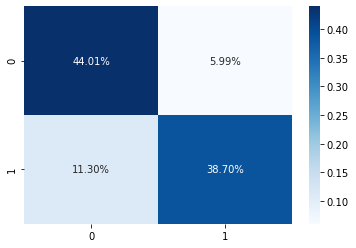

In [28]:
mnb = MultinomialNB()
mnb.fit(X_train,Training_data['y'])
y_expect = Testing_data['y']
mnb_prediction = mnb.predict(X_test)

print(f"\nAccuracy score:")
print(metrics.accuracy_score(y_expect, mnb_prediction, normalize=True, sample_weight=None))
print(f"\nConfusion matrix\n")
cf_matrix = metrics.confusion_matrix(y_expect, mnb_prediction)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')